In [1]:
#Markowitz - Obtaining the Efficient Frontier  - 3 companies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data = pd.read_csv('WMT_FB_BP_2014_2017.csv',index_col='Date')

In [3]:
data.head()

,WMT,FB,BP
Date,,,
2013-12-31,70.753525,54.650002,37.758350
2014-01-02,70.951355,54.709999,37.268997
2014-01-03,70.717583,54.560001,37.183540
2014-01-06,70.321945,57.200001,37.284527
2014-01-07,70.537735,57.919998,37.711742


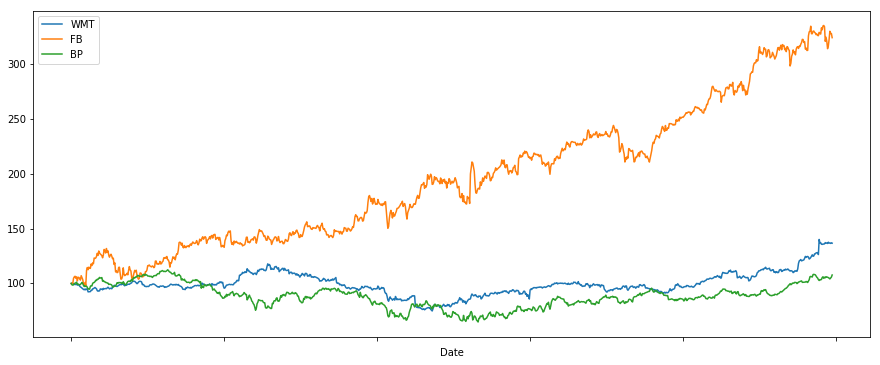

In [4]:
#Do a quick check of the data, normalize it to 100, and see how the 2 stocks were doing during the given timeframe.
(data/data.iloc[0] * 100).plot(figsize=(15,6))

In [5]:
#Calculate their logarithmic returns.
ret = np.log(data/data.shift(1))
ret.head()

,WMT,FB,BP
Date,,,
2013-12-31,NaN,NaN,NaN
2014-01-02,0.002792,0.001097,-0.013045
2014-01-03,-0.003300,-0.002745,-0.002296
2014-01-06,-0.005610,0.047253,0.002712
2014-01-07,0.003064,0.012509,0.011393


In [6]:
ret.mean() * 250

WMT    0.078495
FB     0.295220
BP     0.018603
dtype: float64

In [7]:
ret.cov() *250

,WMT,FB,BP
WMT,0.032659,0.007449,0.005651
FB,0.007449,0.074427,0.013889
BP,0.005651,0.013889,0.056863


In [8]:
ret.corr()

,WMT,FB,BP
WMT,1.000000,0.151081,0.131138
FB,0.151081,1.000000,0.213505
BP,0.131138,0.213505,1.000000


In [9]:
#Create a variable that carries the number of assets in your portfolio.
num_assets = 3

#The portfolio need not be equally weighted. So, create a variable, called “weights”.
#Let it contain as many randomly generated values as there are assets in your portfolio.
#Don’t forget these values should be neither smaller than 0 nor equal or greater than 1!

weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.07009973, 0.13903373, 0.79086653])

In [10]:
w = weights[0] + weights[1] + weights[2]
w

1.0

Now, estimate the expected Portfolio Return, Variance, and Volatility.

Expected Portfolio Return:

In [11]:
np.sum(weights * ret.mean()) * 250

0.061260132296800135

Expected Portfolio Variance:

In [12]:
np.dot(weights.T, np.dot(ret.cov() * 250, weights))

0.040991342019001044

Expected Portfolio Volatility:

In [13]:
np.sqrt(np.dot(weights.T,np.dot(ret.cov() * 250, weights)))

0.20246318682417563

***

The rest of this exercise will be a reproduction of what we did in the previous video.

1)	Create two empty lists. Name them pf_returns and pf_volatilites.

In [14]:
pfolio_returns = []
pfolio_volatilities = []

2)	Create a loop with 1,000 iterations that will generate random weights, summing to 1, and will append the obtained values for the portfolio returns and the portfolio volatilities to pf_returns and pf_volatilities, respectively.

In [15]:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * ret.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(ret.cov() * 250, weights))))

pfolio_returns, pfolio_volatilities
   

([0.06291606861572938,
  0.15346945997703892,
  0.05902636439119927,
  0.036829755292478145,
  0.12368970664683844,
  0.19953866435369674,
  0.15129763184175832,
  0.1709249239611454,
  0.13990501159464014,
  0.10041392826441309,
  0.19283462271157362,
  0.1693122812457085,
  0.10613756625753694,
  0.11485922906742065,
  0.16331594978709463,
  0.15371399975321257,
  0.13739649244838797,
  0.0934381758052029,
  0.17803485862504248,
  0.19903986100367138,
  0.20534801499133856,
  0.16810825031724755,
  0.21479539132626638,
  0.13388057761552621,
  0.050451242168923806,
  0.10316580665987939,
  0.08204088464133649,
  0.10117869863559295,
  0.10889445536320988,
  0.1265502234108468,
  0.11891007700001884,
  0.07989103375251447,
  0.0974185636166483,
  0.08821821443956383,
  0.13481078702020796,
  0.13008083123331546,
  0.19744231857816058,
  0.1791644564272682,
  0.13894838244160312,
  0.10336334514432738,
  0.10324703711467498,
  0.14165584944894638,
  0.17315851199461943,
  0.09960791557

3)	Transform the obtained lists into NumPy arrays and reassign them to pf_returns and pf_volatilites. Once you have done that, the two objects will be NumPy arrays. 

In [16]:
pf_returns = np.array(pfolio_returns)
pf_volatilities = np.array(pfolio_volatilities)

pf_returns, pf_volatilities

(array([0.06291607, 0.15346946, 0.05902636, 0.03682976, 0.12368971,
        0.19953866, 0.15129763, 0.17092492, 0.13990501, 0.10041393,
        0.19283462, 0.16931228, 0.10613757, 0.11485923, 0.16331595,
        0.153714  , 0.13739649, 0.09343818, 0.17803486, 0.19903986,
        0.20534801, 0.16810825, 0.21479539, 0.13388058, 0.05045124,
        0.10316581, 0.08204088, 0.1011787 , 0.10889446, 0.12655022,
        0.11891008, 0.07989103, 0.09741856, 0.08821821, 0.13481079,
        0.13008083, 0.19744232, 0.17916446, 0.13894838, 0.10336335,
        0.10324704, 0.14165585, 0.17315851, 0.09960792, 0.16033536,
        0.12044679, 0.05790219, 0.1248311 , 0.10464409, 0.12551155,
        0.23431122, 0.10362563, 0.16921061, 0.07444188, 0.11357536,
        0.06466418, 0.19829516, 0.16134068, 0.14317995, 0.12858302,
        0.17714268, 0.14604297, 0.24025013, 0.08199583, 0.20972188,
        0.06760447, 0.0822621 , 0.10100785, 0.08472098, 0.20955214,
        0.12188821, 0.17110056, 0.19022566, 0.07

Now, create a dictionary, called portfolios, whose keys are the strings “Return” and “Volatility” and whose values are the NumPy arrays pf_returns and pf_volatilities. 

In [17]:
portfolios = pd.DataFrame({'Return':pf_returns, 'Volatility': pf_volatilities})

In [18]:
portfolios.head()

,Return,Volatility
0,0.062916,0.154713
1,0.153469,0.187457
2,0.059026,0.151892
3,0.036830,0.191518
4,0.123690,0.147043


Finally, plot the data from the portfolios dictionary on a graph. Let the x-axis represent the volatility data from the portfolios dictionary and the y-axis – the data about rates of return. <br />
Organize your chart well and make sure you have labeled both the x- and the y- axes.

Text(0,0.5,'Expected Return')

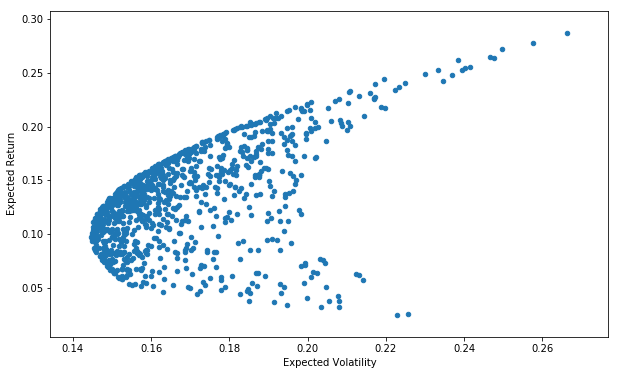

In [19]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

******